## Imports

In [115]:
%load_ext autoreload
%autoreload 2

import logging

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider, IntSlider, widgets, fixed

# Set plotting style.
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
import msml610_utils as ut
import utils_Lesson94_Information_Theory as utils

ut.config_notebook()

# Initialize logger.
logging.basicConfig(level=logging.INFO)
_LOG = logging.getLogger(__name__)

INFO:msml610_utils:Setting notebook style
INFO:msml610_utils:Notebook signature
INFO:msml610_utils:numpy version=1.26.4
INFO:msml610_utils:pymc version=5.18.2
INFO:msml610_utils:matplotlib version=3.10.3
INFO:msml610_utils:arviz version=0.21.0
INFO:msml610_utils:preliz version=0.19.0


Python 3.12.3
Linux e5e5da9c612b 6.10.14-linuxkit #1 SMP Tue Apr 15 16:00:54 UTC 2025 aarch64 aarch64 aarch64 GNU/Linux


# Entropy and Uncertainty

**Entropy** $H(X)$ of a discrete random variable $X$ is defined as:

$$H(X) = -\sum_x p(x) \log_2 p(x)$$

- Entropy quantifies the average level of **information**, **surprise**, or **uncertainty** inherent in the variable's possible outcomes
- High entropy = more unpredictability
- Low entropy = more certainty

In [117]:
# Test with fair coin.
# Two equally likely outcomes → maximum uncertainty, $H = 1$ bit.
fair_coin = [0.5, 0.5]
print(f"Fair coin entropy: {utils.calculate_entropy(fair_coin):.4f} bits")

Fair coin entropy: 1.0000 bits


In [118]:
# Test with biased coin.
# If heads occurs 90% of the time → less uncertainty, $H < 1$ bit.
biased_coin = [0.9, 0.1]
print(
    f"Biased coin (90-10) entropy: {utils.calculate_entropy(biased_coin):.4f} bits"
)

Biased coin (90-10) entropy: 0.4690 bits


In [119]:
# Test with broken coin.
biased_coin = [1.0, 0.0]
print(
    f"Biased coin (100-0) entropy: {utils.calculate_entropy(biased_coin):.4f} bits"
)
# If heads occurs 100% of the time → no uncertainty, $H = 0$ bit.

Biased coin (100-0) entropy: -0.0000 bits


## Entropy vs Variance

Entropy and variance are related but measure different properties:
- **Variance** measures how far values are from the mean
- **Entropy** measures how unpredictable a random draw is

A distribution can have high variance but low entropy, or vice versa.

INFO:utils_Lesson94_Information_Theory:Saved figure to: figures/Lesson94_Bimodal_Distribution.png


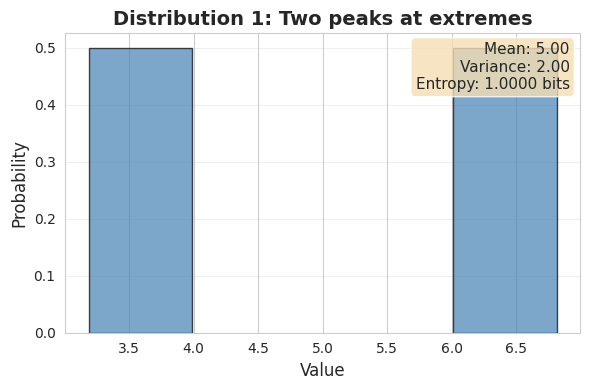

In [120]:
# Compare two distributions with the same variance but different entropy.
# Distribution 1: Bimodal with peaks at extremes.
dist1_values = np.array([5 - np.sqrt(2), 5 + np.sqrt(2)])
dist1_probs = np.array([0.5, 0.5])

filename = "figures/Lesson94_Bimodal_Distribution.png"
utils.plot_distribution_with_stats(
    values=dist1_values,
    probabilities=dist1_probs,
    title="Distribution 1: Two peaks at extremes",
    save_fig=filename,
)
# This distribution has high variance (spread) but low entropy (only 1 bit).

INFO:utils_Lesson94_Information_Theory:Saved figure to: figures/Lesson94_Uniform_Distribution.png


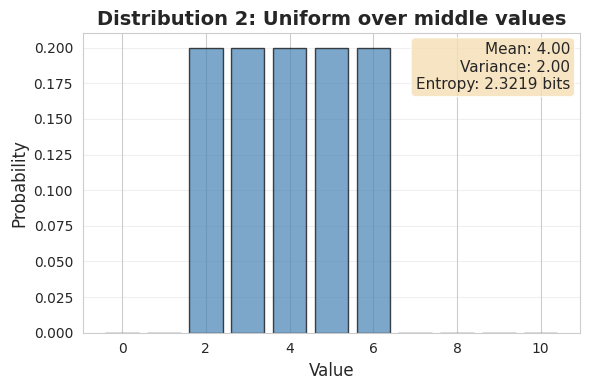

In [121]:
# Distribution 2: Uniform over middle values.
dist2_values = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
dist2_probs = np.array([0.0, 0.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0])

file_name = "figures/Lesson94_Uniform_Distribution.png"
utils.plot_distribution_with_stats(
    values=dist2_values,
    probabilities=dist2_probs,
    title="Distribution 2: Uniform over middle values",
    save_fig=file_name,
)
# This distribution has lower variance but higher entropy (~2.32 bits).

## Entropy and Distribution Spread

Generally, more spread in a distribution leads to higher entropy, but there are exceptions:
- Increasing the support of a uniform distribution increases variance but not entropy
- The relationship depends on the shape of the distribution

INFO:utils_Lesson94_Information_Theory:Saved figure to: figures/Lesson94_Uniform2.png


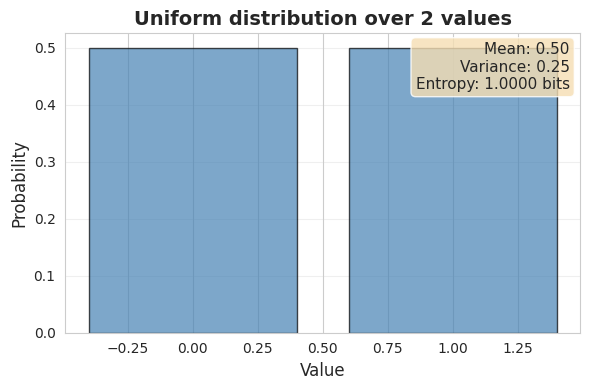

In [122]:
# Example: Uniform distributions with different support.
# Uniform over 2 values.
uniform_2 = np.array([0.5, 0.5])
values_2 = np.array([0, 1])

file_name = "figures/Lesson94_Uniform2.png"
utils.plot_distribution_with_stats(
    values=values_2,
    probabilities=uniform_2,
    title="Uniform distribution over 2 values",
    save_fig=file_name,
)
# A uniform distribution over 2 outcomes has 1 bit of entropy.

INFO:utils_Lesson94_Information_Theory:Saved figure to: figures/Lesson94_Uniform4.png


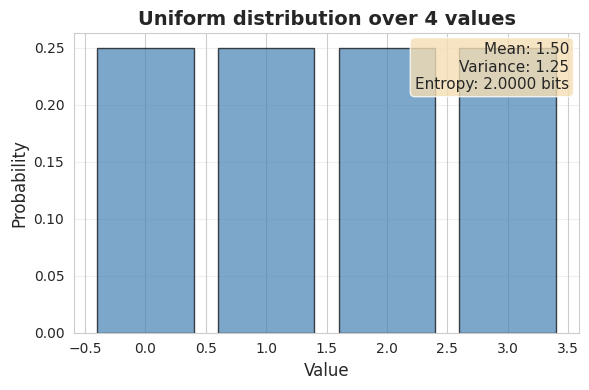

In [123]:
# Uniform over 4 values.
uniform_4 = np.array([0.25, 0.25, 0.25, 0.25])
values_4 = np.array([0, 1, 2, 3])

file_name = "figures/Lesson94_Uniform4.png"
utils.plot_distribution_with_stats(
    values=values_4,
    probabilities=uniform_4,
    title="Uniform distribution over 4 values",
    save_fig=file_name,
)
# A uniform distribution over 4 outcomes has 2 bits of entropy.

INFO:utils_Lesson94_Information_Theory:Saved figure to: figures/Lesson94_Uniform8.png


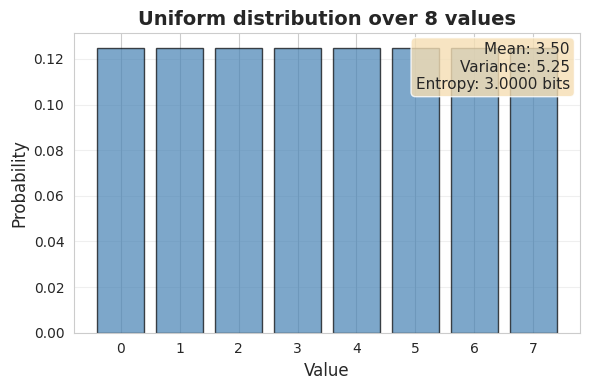

In [124]:
# Uniform over 8 values.
uniform_8 = np.array([0.125] * 8)
values_8 = np.array([0, 1, 2, 3, 4, 5, 6, 7])

file_name = "figures/Lesson94_Uniform8.png"
utils.plot_distribution_with_stats(
    values=values_8,
    probabilities=uniform_8,
    title="Uniform distribution over 8 values",
    save_fig=file_name,
)
# A uniform distribution over 8 outcomes has 3 bits of entropy.

## Entropy and Uncertainty: Shape Matters

Entropy is closely related to the shape of the probability distribution:
- **Flat (uniform) distribution** → high entropy, high uncertainty
- **Sharply peaked distribution** → low entropy, low uncertainty
- **Multi-modal distribution** → can have high entropy despite low variance

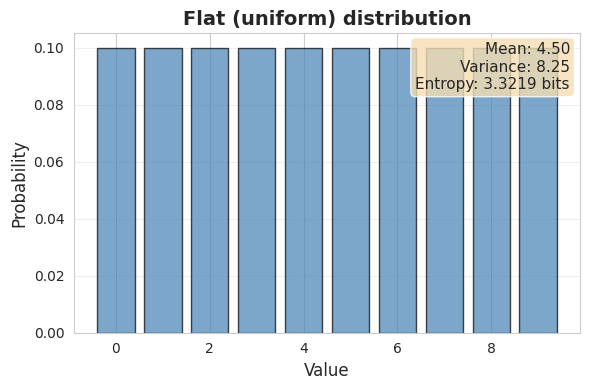

In [125]:
# Example 1: Flat distribution has high entropy.
flat_dist = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
values_flat = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

utils.plot_distribution_with_stats(
    values=values_flat,
    probabilities=flat_dist,
    title="Flat (uniform) distribution",
)
# Uniform distribution has maximum entropy for given number of outcomes.

INFO:utils_Lesson94_Information_Theory:Saved figure to: figures/Lesson94_Sharply_Peaked_Distribution.png


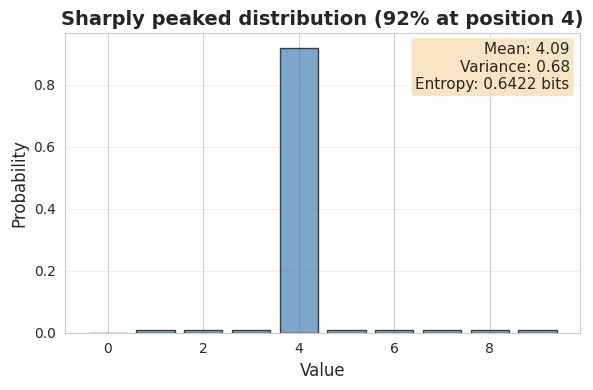

In [126]:
# Example 2: Sharply peaked distribution has low entropy.
peaked_dist = np.array(
    [0.00, 0.01, 0.01, 0.01, 0.92, 0.01, 0.01, 0.01, 0.01, 0.01]
)
values_peaked = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

file_name = "figures/Lesson94_Sharply_Peaked_Distribution.png"
utils.plot_distribution_with_stats(
    values=values_peaked,
    probabilities=peaked_dist,
    title="Sharply peaked distribution (92% at position 4)",
    save_fig=file_name,
)
# Concentrated probability → low uncertainty → low entropy.

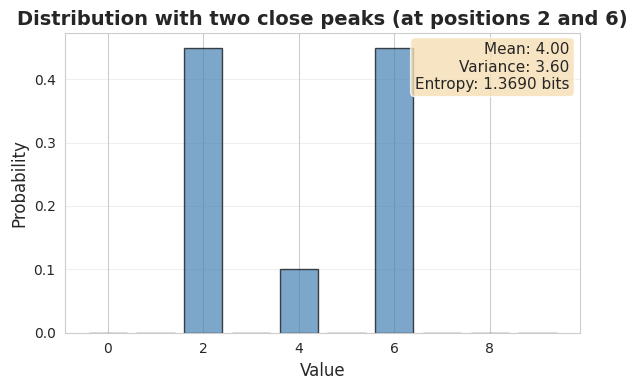

In [127]:
# Example 3: Two close peaks can have low variance but high entropy.
values_two_peaks = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
two_peaks = np.array([0.0, 0.0, 0.45, 0.0, 0.1, 0.0, 0.45, 0.0, 0.0, 0.0])

utils.plot_distribution_with_stats(
    values=values_two_peaks,
    probabilities=two_peaks,
    title="Distribution with two close peaks (at positions 2 and 6)",
)
# Two equally likely peaks → high entropy (~1.1 bits) despite moderate variance.

## Interactive Visualization: Binary Entropy

Use the slider below to adjust the probability $p$ of a binary random variable and observe how entropy changes.

In [128]:
interact(
    utils.plot_binary_entropy_interactive,
    p=FloatSlider(
        min=0.00,
        max=1.00,
        step=0.01,
        value=0.5,
        description="Probability p:",
        style={"description_width": "initial"},
    ),
    n=fixed(100),
    figsize=fixed(None),
)

interactive(children=(FloatSlider(value=0.5, description='Probability p:', max=1.0, step=0.01, style=SliderSty…

<function utils_Lesson94_Information_Theory.plot_binary_entropy_interactive(*, p: float = 0.5, n: int = 100, figsize: Optional[tuple] = None) -> None>

In [129]:
# Generate animation frames for binary entropy visualization.
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="p",
    const_variable="n",
    const_value=100,
    n_steps=11,
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_Binary_Entropy_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_binary_entropy_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 11 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Binary_Entropy_video/
INFO:msml610_utils:All frames have consistent dimensions: 2900x793 pixels


# Joint Entropy

**Joint entropy** $H(X, Y)$ of two variables $X$ and $Y$:

$$H(X, Y) = -\sum_{x,y} p(x,y) \log_2 p(x,y)$$

- Describes the information needed for the joint distribution of $X$ and $Y$
- For independent variables: $H(X, Y) = H(X) + H(Y)$

In [130]:
# Create interactive widget for joint entropy visualization.
interact(
    utils.plot_joint_entropy_interactive,
    dependence=FloatSlider(
        min=0.0,
        max=1.0,
        step=0.05,
        value=0.5,
        description="Dependence:",
        style={"description_width": "initial"},
    ),
    n_samples=IntSlider(
        min=10,
        max=500,
        step=10,
        value=300,
        description="Sample size:",
        style={"description_width": "initial"},
    ),
    figsize=fixed(None),
)

interactive(children=(FloatSlider(value=0.5, description='Dependence:', max=1.0, step=0.05, style=SliderStyle(…

<function utils_Lesson94_Information_Theory.plot_joint_entropy_interactive(*, dependence: float = 0.5, n_samples: int = 100, figsize: Optional[tuple] = None) -> None>

In [131]:
# Generate animation frames for joint entropy visualization.
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="dependence",
    const_variable="n_samples",
    const_value=300,
    n_steps=11,
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_Joint_Entropy_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_joint_entropy_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 11 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Joint_Entropy_video/
INFO:msml610_utils:All frames have consistent dimensions: 2886x793 pixels


# Conditional Entropy

**Conditional entropy** $H(Y|X)$ measures uncertainty in $Y$ after observing $X$:

$$H(Y|X) = -\sum_{x,y} p(x,y) \log_2 p(y|x) = \sum_x p(x) H(Y|X=x)$$

**Properties:**
- Low $H(Y|X)$ implies $X$ has strong predictive power for $Y$
- If $Y = X$, then $H(Y|X) = 0$ (no uncertainty)
- If $X$ and $Y$ are independent, then $H(Y|X) = H(Y)$

- Chain Rule for Entropy
  $$H(X, Y) = H(X) + H(Y|X) = H(Y) + H(X|Y)$$

In [132]:
# Create interactive widget for conditional entropy visualization.
interact(
    utils.plot_conditional_entropy_interactive,
    dependence=FloatSlider(
        min=0.0,
        max=1.0,
        step=0.05,
        value=0.5,
        description="Dependence:",
        style={"description_width": "initial"},
    ),
    figsize=fixed(None),
)

interactive(children=(FloatSlider(value=0.5, description='Dependence:', max=1.0, step=0.05, style=SliderStyle(…

<function utils_Lesson94_Information_Theory.plot_conditional_entropy_interactive(*, dependence: float = 0.5, figsize: Optional[tuple] = None) -> None>

In [133]:
# Generate animation frames for conditional entropy visualization.
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="dependence",
    n_steps=11,
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_Conditional_Entropy_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_conditional_entropy_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 11 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Conditional_Entropy_video/
INFO:msml610_utils:All frames have consistent dimensions: 2886x793 pixels


# Mutual Information

**Mutual information** $I(X;Y)$ measures how much knowing one variable reduces uncertainty about the other:

$$I(X;Y) = H(X) - H(X|Y) = H(Y) - H(Y|X) = H(X) + H(Y) - H(X,Y)$$

- Measures the shared information between two variables
- Quantifies the reduction in uncertainty about one variable given the other
- Symmetric: $I(X;Y) = I(Y;X)$

In [134]:
# Create interactive widget for mutual information with Venn diagram.
interact(
    utils.plot_mutual_information_venn_interactive,
    dependence=FloatSlider(
        min=0.0,
        max=1.0,
        step=0.05,
        value=0.5,
        description="Dependence:",
        style={"description_width": "initial"},
    ),
    scenario=widgets.Dropdown(
        options=["Binary", "Weather"],
        value="Binary",
        description="Scenario:",
        style={"description_width": "initial"},
    ),
    figsize=fixed(None),
)

interactive(children=(FloatSlider(value=0.5, description='Dependence:', max=1.0, step=0.05, style=SliderStyle(…

<function utils_Lesson94_Information_Theory.plot_mutual_information_venn_interactive(*, dependence: float = 0.5, scenario: str = 'Binary', figsize: Optional[tuple] = None) -> None>

In [135]:
# Generate animation frames for mutual information Venn visualization (Binary scenario).
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="dependence",
    n_steps=11,
    scenario="Binary",
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_Mutual_Info1_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_mutual_information_venn_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 11 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Mutual_Info1_video/
INFO:msml610_utils:All frames have consistent dimensions: 2981x727 pixels


In [136]:
# Generate animation frames for mutual information Venn visualization (Weather scenario).
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="dependence",
    n_steps=11,
    scenario="Weather",
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_Mutual_Info2_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_mutual_information_venn_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 11 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Mutual_Info2_video/
INFO:msml610_utils:All frames have consistent dimensions: 2981x727 pixels


In [137]:
# Create interactive widget for correlation-based mutual information.
interact(
    utils.plot_mutual_info_interactive,
    correlation=FloatSlider(
        min=0.0,
        max=1.0,
        step=0.05,
        value=0.5,
        description="Correlation:",
        style={"description_width": "initial"},
    ),
    figsize=fixed(None),
)

interactive(children=(FloatSlider(value=0.5, description='Correlation:', max=1.0, step=0.05, style=SliderStyle…

<function utils_Lesson94_Information_Theory.plot_mutual_info_interactive(*, correlation: float = 0.5, figsize: Optional[tuple] = None) -> None>

In [138]:
# Generate animation frames for mutual information (correlation-based) visualization.
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="correlation",
    n_steps=11,
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_Mutual_Info_Correlation_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_mutual_info_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 11 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Mutual_Info_Correlation_video/
INFO:msml610_utils:All frames have consistent dimensions: 2912x793 pixels


# KL Divergence

**Kullback-Leibler (KL) Divergence** $D_{KL}(P \| Q)$ measures how one distribution differs from another:

$$D_{KL}(P \| Q) = \sum_x P(x) \log_2 \frac{P(x)}{Q(x)}$$

In [139]:
# Create interactive widget.
interact(
    utils.plot_kl_divergence_interactive,
    p1=FloatSlider(
        min=0.05,
        max=0.95,
        step=0.05,
        value=0.7,
        description="P(outcome=1):",
        style={"description_width": "initial"},
    ),
    q1=FloatSlider(
        min=0.05,
        max=0.95,
        step=0.05,
        value=0.5,
        description="Q(outcome=1):",
        style={"description_width": "initial"},
    ),
    figsize=fixed(None),
)

interactive(children=(FloatSlider(value=0.7, description='P(outcome=1):', max=0.95, min=0.05, step=0.05, style…

<function utils_Lesson94_Information_Theory.plot_kl_divergence_interactive(*, p1: float = 0.7, q1: float = 0.5, figsize: Optional[tuple] = None) -> None>

In [140]:
# Generate animation frames for KL divergence visualization.
# Fix true distribution P at p1=0.7, vary approximating distribution Q.
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="q1",
    const_variable="p1",
    const_value=0.7,
    n_steps=19,
    sweep_min=0.05,
    sweep_max=0.95,
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_KL_Divergence_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_kl_divergence_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 19 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_KL_Divergence_video/
INFO:msml610_utils:All frames have consistent dimensions: 2900x799 pixels


# Cross-Entropy

**Cross-entropy** $H(P, Q)$ measures the average number of bits needed to encode data from $P$ using code optimized for $Q$:

$$H(P, Q) = -\sum_x P(x) \log_2 Q(x)$$

**Relationship:**
$$H(P, Q) = H(P) + D_{KL}(P \| Q)$$

**Applications:**
- Loss function in classification (logistic regression, neural networks)
- Model evaluation and comparison
- Information compression

In [141]:
# Adjust the sliders to see how cross-entropy changes when the true distribution P and model distribution Q differ:
# - When P = Q (on diagonal), cross-entropy equals entropy H(P) (optimal encoding)
# - When P != Q, cross-entropy = H(P) + D_KL(P||Q) (extra cost from model mismatch)
# - This extra cost is why cross-entropy works as a loss function in machine learning

# Create interactive widget for cross-entropy visualization.
interact(
    utils.plot_cross_entropy_interactive,
    p1=FloatSlider(
        min=0.05,
        max=0.95,
        step=0.05,
        value=0.7,
        description="P(outcome=1):",
        style={"description_width": "initial"},
    ),
    q1=FloatSlider(
        min=0.05,
        max=0.95,
        step=0.05,
        value=0.5,
        description="Q(outcome=1):",
        style={"description_width": "initial"},
    ),
    figsize=fixed(None),
)

interactive(children=(FloatSlider(value=0.7, description='P(outcome=1):', max=0.95, min=0.05, step=0.05, style…

<function utils_Lesson94_Information_Theory.plot_cross_entropy_interactive(*, p1: float = 0.7, q1: float = 0.5, figsize: Optional[tuple] = None) -> None>

In [142]:
# Generate animation frames for cross-entropy visualization.
# Fix true distribution P at p1=0.7, vary model distribution Q.
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="q1",
    const_variable="p1",
    const_value=0.7,
    n_steps=11,
    sweep_min=0.05,
    sweep_max=0.95,
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_Cross_Entropy_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_cross_entropy_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 11 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Cross_Entropy_video/
INFO:msml610_utils:All frames have consistent dimensions: 2900x793 pixels


# Data Processing Inequality

**Statement:** Processing data cannot increase information, it can only lose information.

Formally, if $X \to Y \to Z$ forms a Markov chain, then:
$$I(X;Z) \leq I(X;Y)$$

**Intuition:** Information can only be lost through processing, never gained.

**Example:** If $X$ is a raw image and $Y$ is compressed version, no further processing $Z$ will recover more information about $X$ than $Y$ already contains.

In [143]:
# Use the slider below to control the noise level in a data processing pipeline (X -> Y -> Z) and observe how information degrades through successive stages.
# - **Noise Level = 0.0**: Clean processing, minimal information loss, I(X;Z) close to I(X;Y)
# - **Noise Level = 1.0**: Maximum noise, substantial information loss, I(X;Z) << I(X;Y)
# - The inequality I(X;Z) <= I(X;Y) is always satisfied, demonstrating the fundamental principle

# Create interactive widget for data processing inequality visualization.
interact(
    utils.plot_data_processing_inequality_interactive,
    noise_level=FloatSlider(
        min=0.0,
        max=1.0,
        step=0.05,
        value=0.2,
        description="Noise Level:",
        style={"description_width": "initial"},
    ),
    scenario=widgets.Dropdown(
        options=["Compression", "Quantization", "Binary"],
        value="Compression",
        description="Scenario:",
        style={"description_width": "initial"},
    ),
    figsize=fixed(None),
)

interactive(children=(FloatSlider(value=0.2, description='Noise Level:', max=1.0, step=0.05, style=SliderStyle…

<function utils_Lesson94_Information_Theory.plot_data_processing_inequality_interactive(*, noise_level: float = 0.2, scenario: str = 'Compression', figsize: Optional[tuple] = None) -> None>

In [144]:
# Generate animation frames for data processing inequality visualization.
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="noise_level",
    n_steps=21,
    scenario="Compression",
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_Data_Processing_Inequality_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_data_processing_inequality_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 21 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Data_Processing_Inequality_video/
INFO:msml610_utils:All frames have consistent dimensions: 2820x796 pixels


# Maximum Entropy Principle

**Principle:** Use the distribution with the largest entropy given the constraints.

**Examples of maximum entropy distributions:**
- No constraints → Uniform distribution
- Positive mean constraint → Exponential distribution
- Fixed variance → Normal distribution

# Minimum Description Length (MDL)

**Principle:** Select the model that minimizes total description length:

$$MDL(H) = L(H) + L(D | H)$$

where:
- $L(H)$ = length of the model/hypothesis
- $L(D|H)$ = length of data encoded using the model

**Intuition:** Balances model complexity with data fit (Occam's Razor principle)

In [145]:
# Use the slider below to adjust the polynomial degree and observe how MDL balances model complexity with data fit:
# - **Low degree (1-2)**: Simple model, poor fit, high data encoding cost (underfitting)
# - **Optimal degree (3-4)**: Balanced model, minimum total MDL
# - **High degree (6-8)**: Complex model, high model cost, overfitting penalty

# Create interactive widget for MDL visualization.
interact(
    utils.plot_mdl_interactive,
    degree=IntSlider(
        min=1,
        max=8,
        step=1,
        value=3,
        description="Polynomial Degree:",
        style={"description_width": "initial"},
    ),
    n_samples=fixed(50),
    true_degree=fixed(3),
    noise_level=fixed(0.3),
    figsize=fixed(None),
)

interactive(children=(IntSlider(value=3, description='Polynomial Degree:', max=8, min=1, style=SliderStyle(des…

<function utils_Lesson94_Information_Theory.plot_mdl_interactive(*, degree: int = 3, n_samples: int = 50, true_degree: int = 3, noise_level: float = 0.3, figsize: Optional[tuple] = None) -> None>

In [146]:
# Generate animation frames for MDL visualization.
values = ut.generate_animation_values(
    mode="linear",
    sweep_variable="degree",
    n_steps=8,
    sweep_min=1,
    sweep_max=8,
    n_samples=50,
    true_degree=3,
    noise_level=0.3,
)

# Directory to save frames.
dst_dir = "./figures/Lesson94_MDL_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_mdl_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 8 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_MDL_video/
INFO:msml610_utils:All frames have consistent dimensions: 2900x793 pixels


# Kolmogorov Complexity

**Definition:** The length of the shortest program that outputs a string $x$.

**Examples:**
- String "00000000..." has low complexity (simple loop)
- Random string has high complexity (no pattern, no compression)

**Properties:**
- Not computable (theoretical concept)
- Related to MDL in practice
- Measures algorithmic randomness

Use the controls below to explore how different string types have different Kolmogorov Complexity:
- **String Type**: Choose between structured patterns (low K-complexity) and random strings (high K-complexity)
- **Length**: Observe how K-complexity scales differently for patterns vs random strings

Key insights:
- Patterned strings: Short program generates long output (low K-complexity)
- Random strings: Must include all bits in description (high K-complexity, incompressible)
- K-complexity is uncomputable, but compression gives practical approximation

In [147]:
# Create interactive widget for Kolmogorov Complexity visualization.
interact(
    utils.plot_kolmogorov_complexity_interactive,
    string_type=widgets.Dropdown(
        options=[
            "All Zeros",
            "Repeating 01",
            "Fibonacci",
            "Random",
            "Semi-random",
        ],
        value="Random",
        description="String Type:",
        style={"description_width": "initial"},
    ),
    length=widgets.Dropdown(
        options=[16, 32, 64, 128],
        value=64,
        description="String Length:",
        style={"description_width": "initial"},
    ),
    figsize=fixed(None),
)

interactive(children=(Dropdown(description='String Type:', index=3, options=('All Zeros', 'Repeating 01', 'Fib…

<function utils_Lesson94_Information_Theory.plot_kolmogorov_complexity_interactive(*, string_type: str = 'Random', length: int = 64, figsize: Optional[tuple] = None) -> None>

In [148]:
# Generate animation frames for Kolmogorov Complexity visualization.
# Sweep through different string types with fixed length.
string_types = [
    "All Zeros",
    "Repeating 01",
    "Fibonacci",
    "Semi-random",
    "Random",
]
values = [{"string_type": st, "length": 64} for st in string_types]

# Directory to save frames.
dst_dir = "./figures/Lesson94_Kolmogorov_Complexity_video"

# Generate animation frames with fixed dimensions.
ut.generate_animation(
    utils.plot_kolmogorov_complexity_interactive,
    values,
    dst_dir,
    incremental=False,
    figsize=(20, 5),
    dpi=150,
)

INFO:msml610_utils:Generating 5 frames...
INFO:msml610_utils:Frames saved to ./figures/Lesson94_Kolmogorov_Complexity_video/
INFO:msml610_utils:All frames have consistent dimensions: 2851x784 pixels
